# Using Climate Data - Section 1: Introduction to Climate Change

* Created by Stephen Haddad and Maria Athanassiadou
* Organisation - Met Office Informatics Lab

In this tutorial we will be looking at how easy it is to access and use climate to understand the impact of climate change on small businesses in a local area. But first we will address the question of why we might want to do this. So we will start by considering what is climate change, what climate data is available and how individuals and businesses are affected by climate impacts.


## Overview

In this notebook we will look at:
* The difference between weather and climate
* The history of research into global warming and climate change
* What data is available to study climate change and its impacts

## Weather and Climate

https://www.metoffice.gov.uk/weather/climate 

What is the difference between the weather and the climate? They're both describing the atmosphere in terms of temperature, humidity, wind, rain etc. So why do we have the two separate terms to things that sound similar? The main difference between weather and climate is that they each refer to a different timescale. Weather describes the conditions of the atmosphere over hourly or daily measurements such as temperature, rainfall, cloudiness, sunshine, and wind speeds. Climate, on the other hand, is the average of these conditions over longer time periods ranging from years to decades.

In the words of Robert Heinlein, *Climate is what you expect, weather is what you get*. Perhaps even more simply, *Weather is how you choose your outfit, climate is how you choose your wardrobe*.

https://www.youtube.com/watch?v=bjwmrg__ZVw

So to translate that into data terms, what does weather data look like and how is climate data different.

Weather data examples:
* the current air temperature and humidity
* the amount of rain the fell in the past 12 hours
* the current wind speed and direction
* maximum gust of wind in the last hour
* The total energy of the solar radiation recorded at a location today

Climate Data Examples:
* the average maximum temperature for a location for a particular month
* the number of days with precipitation greater than 5mm
* the average wind speed for a particular month
* the prevailing wind direction in a particular month and location
* the average daily solar radiation energy for a particular location and month


## What is climate change?

https://www.metoffice.gov.uk/weather/climate

Whilst there is natural variability in both weather and climate, 'climate change' refers to systematic, large-scale, long-term shift in the planet’s weather patterns and average temperatures. These changes can be in response to natural factors (e.g. a volcanic eruption or changes in solar activity) or a result of human activities (e.g. emissions of greenhouse gases from industry or changes in land use).

Since the last ice age which ended about 11,000 years ago, the Earth's climate has been relatively stable with an average global temperature of about 14 °C. However, global temperatures have risen significantly over the 20th and 21st centuries, causing a range of impacts such as changes to rainfall patterns, rising sea levels, and seasonal changes. There is overwhelming and growing evidence that the change in climate over this time period is due to vastly increased, and still increasing, quantities of greenhouse gas in the atmosphere. In fact, since the Industrial Revolution, atmospheric CO2 has increased by over 40% to levels that are unprecedented in at least 800,000 years.

https://www.youtube.com/watch?v=uHbxSYDqTR8

The plot below comes from the Met Office's HadCRUT5 dataset of global average temperatures (described in [Morice et al.](https://www.metoffice.gov.uk/hadobs/hadcrut5/HadCRUT5_accepted.pdf)), showing the rise in global average temperatures compared to pre-industrial levels.

![HadCRUT5 Changes in global temperature](https://www.metoffice.gov.uk/hadobs/hadcrut5/figures/HadCRUT5_figure_7.png)

## Introduction to climate datasets

https://www.metoffice.gov.uk/weather/climate/climate-observations

In order to understand the past, present and future climate, the Met Office and other other climate researchers need to gather and produce datasets. A starting point for a lot of research is to take some measurements, and climate science is no different. The Met Office was a *data driver organisation* and a user of *big data* well before either of those terms were fashionable or widely used!

What sort of data is produced and used for climate research? We have two main sources for studying the climate: observations and simulations.


### Observational Datasets

Our observational datasets aim to tell us about the current and past states of the climate. We have a variety of different ways of measuring the climate:

* ground stations - traditional weather stations with wet and dry bulb thermometers, rain guages etc.
   * The oldest observational record in the world is the Central England Temperature record, going back to 1659. https://www.metoffice.gov.uk/hadobs/hadcet/
   * We have a network of weather stations across the UK https://www.metoffice.gov.uk/research/climate/maps-and-data/uk-synoptic-and-climate-stations
   * Through the World Meteorological Organisation (WMO) weather observations are shared freely around the world. https://public.wmo.int/en
* satellite observations -  since the advent of artificial satellites orbiting the earth in the 1960's we have been able to use this high-level view to make much more comprehensive measurements of weather and climate, especially in sparsely populated areas and over the oceans where previously there were few or no measurements e.g. the Southern Ocean, Africa.
  * The UK participates in the EUMetSat project https://view.eumetsat.int/productviewer?v=default
* In order to understand how climate changes over long periods of time, we need to look for data that goes back further than a few hundred years. This is called *Paleoclimate*. Here look for indirect measurments of key physical levels such as temperature or levels of carbon dioxide in the atmosphere. https://www.ipcc.ch/site/assets/uploads/2018/02/ar4-wg1-chapter6-1.pdf
  * Indirect measurments include ice cores, tree growth rings, isotopes of certain elements etc.


There are lots of different sorts of measurements that we collect. One of the tasks of the Met Office and similar organisations is to join the different data sources together into a single *gridded* climate dataset that covers the whole of the UK or the whole of the surface of the earth.
* The Met Office produced the *HadCRUT* temperature dataset: https://www.metoffice.gov.uk/hadobs/hadcrut5/
* ECWMF produces a *reanalysis* which is a physically consistent simulation of the atmosphere constrained by observations: https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era5


In [1]:
import boto3
import botocore
import datetime
import matplotlib.pyplot as plt
import os.path
import s3fs

In [54]:
import xarray as xr
import matplotlib.pyplot
import iris
import iris.quickplot
import iris.coord_categorisation
import cartopy.crs

In [3]:
era5_bucket = 'era5-pds'

# AWS access / secret keys required
s3 = boto3.resource('s3')
bucket = s3.Bucket(era5_bucket)

# No AWS keys required
client = boto3.client('s3', config=botocore.client.Config(signature_version=botocore.UNSIGNED))

In [7]:
current_var = 'air_temperature_at_2_metres'
current_month = datetime.datetime(2019,1,1)

In [9]:
fs1 = s3fs.S3FileSystem()
path1 = f's3://{era5_bucket}/{current_month.year:04d}/{current_month.month:02d}/data/{current_var}.nc'
fileObj1 = fs1.open(path1)
temp_201901 = xr.open_dataset(fileObj1, engine='h5netcdf')
temp_201901

<xarray.Dataset>
Dimensions:                      (lat: 721, lon: 1440, time0: 744)
Coordinates:
  * lon                          (lon) float32 0.0 0.25 0.5 ... 359.5 359.8
  * lat                          (lat) float32 90.0 89.75 89.5 ... -89.75 -90.0
  * time0                        (time0) datetime64[ns] 2019-01-01 ... 2019-0...
Data variables:
    air_temperature_at_2_metres  (time0, lat, lon) float32 ...
Attributes:
    source:       Reanalysis
    institution:  ECMWF
    title:        ERA5 forecasts

In [14]:
tem_cube = temp_201901[current_var][0,:,:].to_iris()

In [15]:
tem_cube

<iris 'Cube' of air_temperature / (K) (latitude: 721; longitude: 1440)>

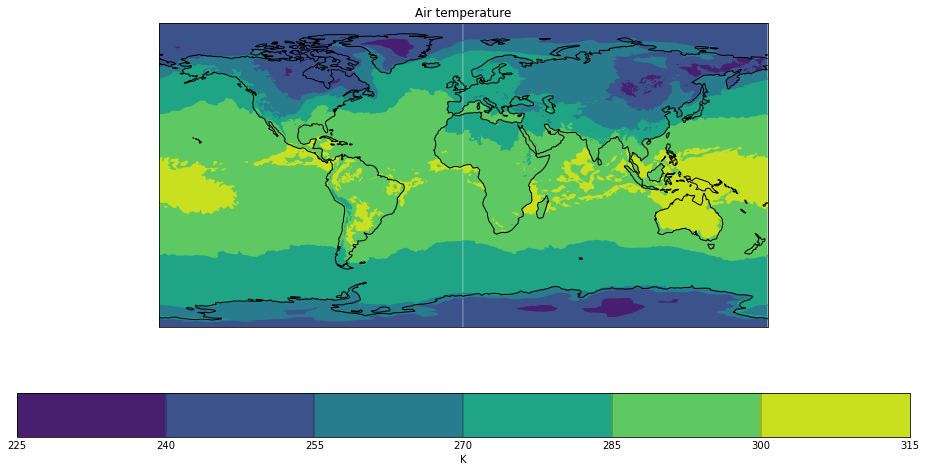

In [20]:
fig1 = matplotlib.pyplot.figure(figsize=(16,8))
ax1 = fig1.add_subplot(1,1,1,projection=cartopy.crs.PlateCarree())
iris.quickplot.contourf(tem_cube,axes=ax1)
ax1.coastlines()

In [21]:
temp_ts = temp_201901[current_var][:, 180, 720].to_iris()

In [22]:
temp_ts

Air Temperature (K),time
Shape,744
Dimension coordinates,
time,x
Scalar coordinates,
latitude,45.0 degrees_north
longitude,180.0 degrees_east
Attributes,
least_significant_digit,[1]
nameCDM,2_metre_temperature_surface
nameECMWF,2 metre temperature


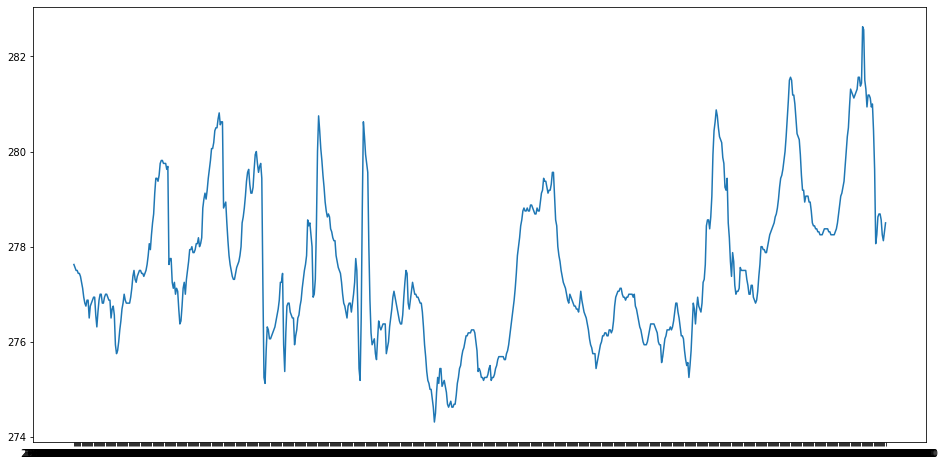

In [35]:
fig1 = matplotlib.pyplot.figure(figsize=(16,8))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot([str(i1.point) for i1 in temp_ts.coord('time').cells()], temp_ts.data.data)

## Climate Simulations

Climate observations tell us about the past and present state of the climate of the earth. We can't use observations though to understand what the state of the climate will be in future. For that we need a way of simulate the climate system of the earth. The Met Office and other similar organisations have developed sophisticated physics-based simulation software to simulate the climate of the earth and predict it future state. The climate is also a *chaotic* system, which small changes in the initial state can become large changes later on. So we run several simulations to see multiple possible outcomes. This collection of simulations is called an *ensemble*. Running detailed simulations is computationally expensive requiring a powerful supercomputer, so different organisations share their results for others to use in their research. Setting up and running these simulations form the core of large collaborative projects. Two projects relevant to our disucssion are:

* Climate Model Intercomprison Project, Sixth Phase (*CMIP6*)
* UK Climate Projections 2018 (*UKCP18*) 


### CMIP6

A large international collaboration, the output from this project is the standard climate research dataset around the world. This data feed into international agreements and groups such as the Paris Agreements and the Intergovermental Panel on Climate Change. 


Modelling different scenarios
Climate model as an experiment
Standard dataset for future climate
used as input for IPCC reports that feed into COP UN Framework Convention of Climate Change

How to access CMIP6 data through AWS and intake

In [9]:
import pathlib
import datetime

In [62]:
import matplotlib
import matplotlib.pyplot

In [66]:
import iris
import iris.coord_categorisation
import iris.quickplot
import cartopy
import cartopy.crs

In [93]:
import intake

In [94]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,17
institution_id,36
source_id,85
experiment_id,160
member_id,550
table_id,37
variable_id,709
grid_label,10
zstore,456856
dcpp_init_year,60


In [96]:
tasmax_dwd_ssp585 = col.search(
    experiment_id=["ssp585"],
    variable_id="tasmax",
    grid_label="gn",
    institution_id='DWD',
).to_dataset_dict()['ScenarioMIP.DWD.MPI-ESM1-2-HR.ssp585.Amon.gn']


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


/home/ec2-user/anaconda3/envs/using_climate_data/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'axis'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


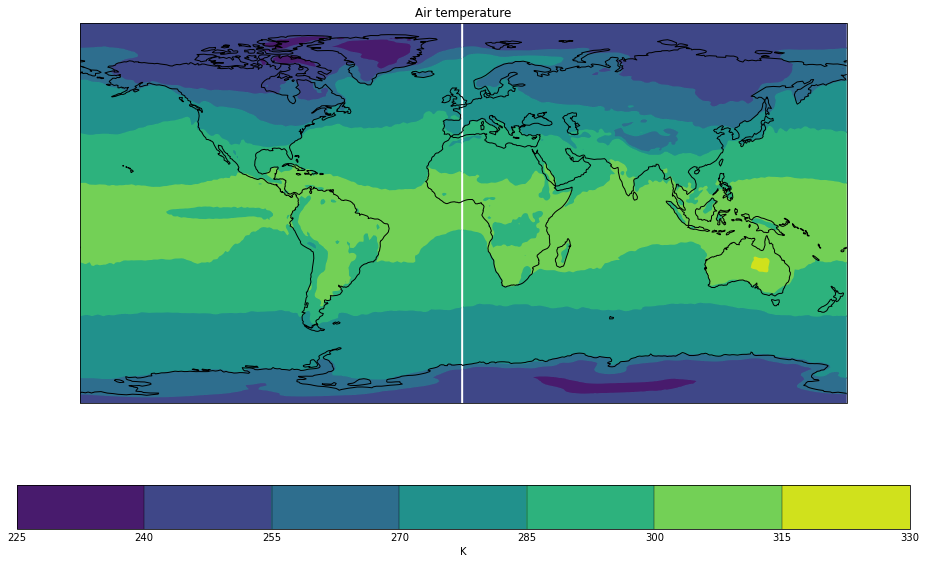

In [114]:
fig_dwd_tasmax = matplotlib.pyplot.figure('dwd_tasmax_single_time', figsize=(16,10))
ax_dwd_tasmax = fig_dwd_tasmax.add_subplot(1,1,1,title='tasmax DWD ssp585 - single time', projection=cartopy.crs.PlateCarree())
iris.quickplot.contourf(tasmax_dwd_ssp585['tasmax'][0,0,:,:].to_iris(), axis=ax_dwd_tasmax)
ax_dwd_tasmax.coastlines()

In [122]:
cape_town_tasmax = tasmax_dwd_ssp585['tasmax'][0,:,62,20].to_iris()
cape_town_tasmax

Air Temperature (K),time
Shape,1032
Dimension coordinates,
time,x
Scalar coordinates,
height,2.0 m
latitude,-31.324557701757275 degrees_north
longitude,18.75 degrees_east
member_id,r2i1p1f1
Attributes,
cell_measures,area: areacella


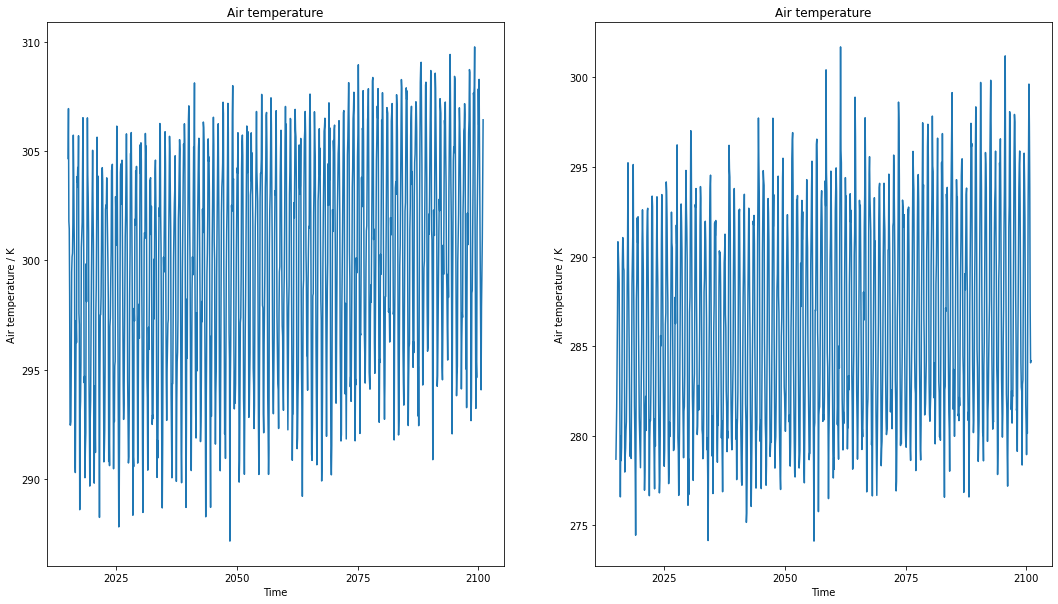

In [138]:
fig_dwd_tasmax_capetown_exeter = matplotlib.pyplot.figure('dwd_tasmax_ct_ts', figsize=(18,10))
ax_dwd_tasmax_capetown = fig_dwd_tasmax_capetown_exeter.add_subplot(1,2,1,title='tasmax DWD ssp585 - cape town time series')
iris.quickplot.plot(cape_town_tasmax, axes=ax_dwd_tasmax_capetown)
ax_dwd_tasmax_exeter = fig_dwd_tasmax_capetown_exeter.add_subplot(1,2,2,title='tasmax DWD ssp585 - exeter time series')
iris.quickplot.plot(tasmax_dwd_ssp585['tasmax'][0,:,151,382].to_iris(), axes=ax_dwd_tasmax_exeter)

### UK Climate Projections

https://www.metoffice.gov.uk/research/approach/collaboration/ukcp/index

The UK Climate Projections (UKCP) provides the most up-to-date assessment of how the UK climate may change in the future.
It is a UK focused set of high-resolution climate simulations focused on UK impacts of climate change.

In [43]:
impact_lab_bucket_name = 'impactlab-events'
using_climate_data_dir_name = 'using-climate-data'

In [37]:
selected_var = 'tasmax'
ensemble_member_list = [1,4,5,6,7,8,9,10,11,12,13,15]
ensemble_member = ensemble_member_list[0]
data_version = 'v20190731'
scenario = 'rcp85'
data_category = 'land-cpm'
selected_area = 'uk'
res = '2.2km'
freq = 'day'
format_ext = 'nc'

In [45]:
start_date = datetime.datetime(2039,12,1)
end_date = datetime.datetime(2040,11,30)

In [46]:
start_date_str = f'{start_date.year:04d}{start_date.month:02d}{start_date.day:02d}'
end_date_str = f'{end_date.year:04d}{end_date.month:02d}{end_date.day:02d}'

In [47]:
selected_fname = f'{selected_var}_{scenario}_{data_category}_{selected_area}_{res}_{ensemble_member:02d}_{freq}_{start_date_str}-{end_date_str}.{format_ext}'
selected_fname

'tasmax_rcp85_land-cpm_uk_2.2km_01_day_20391201-20401130.nc'

In [77]:
selected_path = f's3://{impact_lab_bucket_name}/{using_climate_data_dir_name}/{current_var}/{selected_fname}'
s3_key = f'{using_climate_data_dir_name}/{current_var}/{selected_fname}'
selected_path

's3://impactlab-events/using-climate-data/tasmax/tasmax_rcp85_land-cpm_uk_2.2km_01_day_20391201-20401130.nc'

In [78]:
s3_res = boto3.resource('s3')
s3_res.Bucket(impact_lab_bucket_name).download_file(s3_key, selected_fname)

In [49]:
fileObj_uk_temp_2039 = fs1.open(selected_path)
temp_uk_2039 = xr.open_dataset(fileObj_uk_temp_2039, engine='h5netcdf')
temp_uk_2039

<xarray.Dataset>
Dimensions:                     (bnds: 2, ensemble_member: 1, grid_latitude: 606, grid_longitude: 484, time: 360)
Coordinates:
  * ensemble_member             (ensemble_member) int32 1
  * time                        (time) object 2039-12-01 12:00:00 ... 2040-11...
  * grid_latitude               (grid_latitude) float64 -4.683 -4.647 ... 8.063
  * grid_longitude              (grid_longitude) float64 353.9 354.0 ... 364.3
    ensemble_member_id          (ensemble_member) |S27 ...
    latitude                    (grid_latitude, grid_longitude) float64 ...
    longitude                   (grid_latitude, grid_longitude) float64 ...
    month_number                (time) int32 ...
    year                        (time) int32 ...
    yyyymmdd                    (time) |S64 ...
Dimensions without coordinates: bnds
Data variables:
    tasmax                      (ensemble_member, time, grid_latitude, grid_longitude) float32 ...
    rotated_latitude_longitude  int32 ...
    time_bnds                   (time, bnds) object ...
    grid_latitude_bnds          (grid_latitude, bnds) float64 ...
    grid_longitude_bnds         (grid_longitude, bnds) float64 ...
Attributes: (12/15)
    collection:      land-cpm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2019-07-30T08:13:33
    domain:          uk
    frequency:       day
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    ...              ...
    resolution:      2.2km
    scenario:        rcp85
    source:          UKCP18 realisation from a set of 12 convection-permittin...
    title:           UKCP18 land projections - 2.2km convection-permitting cl...
    version:         v20190731
    Conventions:     CF-1.5

In [82]:
temp_cube_2039_2040 = iris.load_cube(selected_fname)
temp_cube_2039_2040

Air Temperature (degC),ensemble_member,time,grid_latitude,grid_longitude
Shape,1,360,606,484
Dimension coordinates,,,,
ensemble_member,x,-,-,-
time,-,x,-,-
grid_latitude,-,-,x,-
grid_longitude,-,-,-,x
Auxiliary coordinates,,,,
ensemble_member_id,x,-,-,-
month_number,-,x,-,-
year,-,x,-,-


In [85]:
iris.coord_categorisation.add_season(temp_cube_2039_2040, 'time', name='clim_season')

In [86]:
temp_seasonal_means = temp_cube_2039_2040.aggregated_by(['clim_season'], iris.analysis.MEAN)

In [87]:
[i1 for i1 in temp_seasonal_means.coord('time').cells()]

[Cell(point=cftime.Datetime360Day(2040, 1, 16, 0, 0, 0, 0), bound=(cftime.Datetime360Day(2039, 12, 1, 0, 0, 0, 0), cftime.Datetime360Day(2040, 3, 1, 0, 0, 0, 0))),
 Cell(point=cftime.Datetime360Day(2040, 4, 16, 0, 0, 0, 0), bound=(cftime.Datetime360Day(2040, 3, 1, 0, 0, 0, 0), cftime.Datetime360Day(2040, 6, 1, 0, 0, 0, 0))),
 Cell(point=cftime.Datetime360Day(2040, 7, 16, 0, 0, 0, 0), bound=(cftime.Datetime360Day(2040, 6, 1, 0, 0, 0, 0), cftime.Datetime360Day(2040, 9, 1, 0, 0, 0, 0))),
 Cell(point=cftime.Datetime360Day(2040, 10, 16, 0, 0, 0, 0), bound=(cftime.Datetime360Day(2040, 9, 1, 0, 0, 0, 0), cftime.Datetime360Day(2040, 12, 1, 0, 0, 0, 0)))]

/home/ec2-user/anaconda3/envs/using_climate_data/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


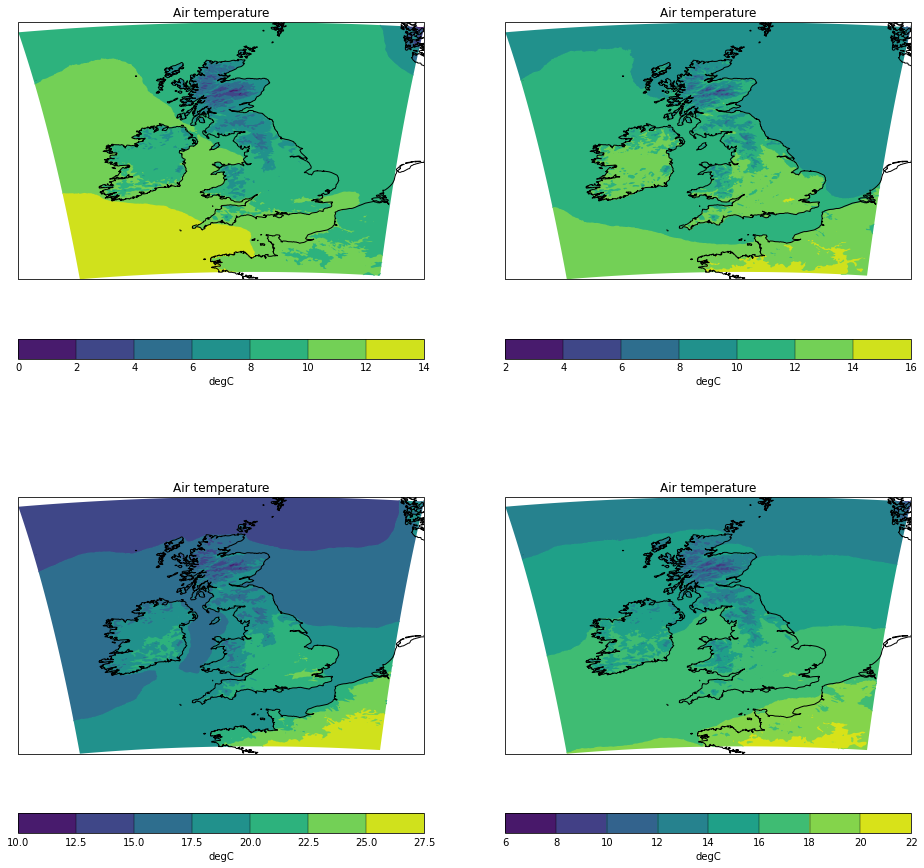

In [89]:
fig_seasonal_means = matplotlib.pyplot.figure('temp_seasonal_mean', figsize=(16,16))
ax1 = fig_seasonal_means.add_subplot(2,2,1,projection=cartopy.crs.PlateCarree())
iris.quickplot.contourf(temp_seasonal_means[0,0,:,:])
ax1.coastlines()
ax1 = fig_seasonal_means.add_subplot(2,2,2,projection=cartopy.crs.PlateCarree())
iris.quickplot.contourf(temp_seasonal_means[0,1,:,:])
ax1.coastlines()
ax1 = fig_seasonal_means.add_subplot(2,2,3,projection=cartopy.crs.PlateCarree())
iris.quickplot.contourf(temp_seasonal_means[0,2,:,:])
ax1.coastlines()
ax1 = fig_seasonal_means.add_subplot(2,2,4,projection=cartopy.crs.PlateCarree())
iris.quickplot.contourf(temp_seasonal_means[0,3,:,:])
ax1.coastlines()

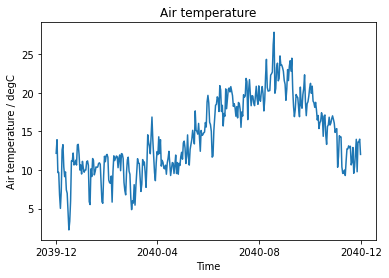

In [92]:
iris.quickplot.plot(temp_cube_2039_2040[0,:,129,234])

Download UKCP from CEDA
* rss https://data.ceda.ac.uk/badc/ukcp18/data/land-cpm/uk/2.2km/rcp85/15/rss/day/v20190731
* sfcWind https://data.ceda.ac.uk/badc/ukcp18/data/land-cpm/uk/2.2km/rcp85/15/sfcWind/day/v20190731
* tasmax https://data.ceda.ac.uk/badc/ukcp18/data/land-cpm/uk/2.2km/rcp85/15/tasmax/day/v20190731
* tasmin https://data.ceda.ac.uk/badc/ukcp18/data/land-cpm/uk/2.2km/rcp85/15/tasmin/day/v20190731

So we can see that data about the current state of the climate, as well as projections of the future state of the climate are widely avaialble. This is all very well and good, but we asre not ultimately interested in what change there will in  the temperature or rainfall values for the whole of the UK or even a particular location in the UK. The question we are trying to answer is: what does this mean me for me as an individual or for my business. In the next section we will look at the the topic of *Climate Impacts*, which is how we translate the meteorlogical values into monetary or other values that capture what the impact of climate change. 